File name: img/riesgo0.png
y: Acciones Terceros
File name: img/riesgo1.png
class or y: Probable Geotecnia
The number of rows:  30018


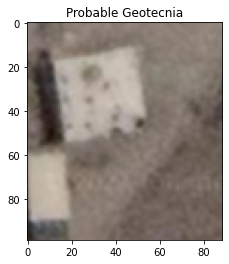

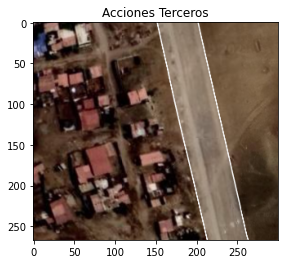

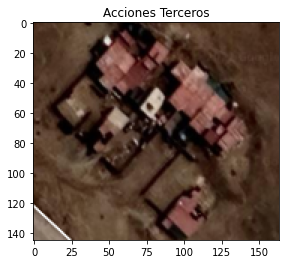

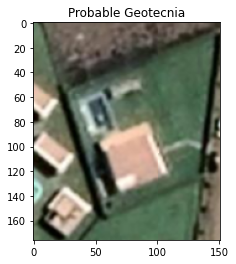

The shape of the first element tensor:  torch.Size([3, 20, 20])


ValueError: cannot reshape array of size 1200 into shape (20,20)

In [6]:
def show_data(data_sample, shape = (28, 28)):#(28,28)
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='jet')
    plt.title('y = ' + data_sample[1])
    

  # These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)  
    
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os
    # Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index3.csv'
csv_path=os.path.join(directory,csv_file)


data_name = pd.read_csv(csv_path)
data_name.head()


# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])


# Get the value on location row 0, column 0 (Notice that index starts at 0.)

print('y:', data_name.iloc[0, 0])


# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])



# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])




# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name



image_path=os.path.join(directory,image_name)
image_path



image = Image.open(image_path)
plt.imshow(image,cmap='jet', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()


# Plot the 20th image

image_name = data_name.iloc[40, 1] #[9,1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='jet', vmin=0, vmax=255)
plt.title(data_name.iloc[40, 0])  #[9,1]
plt.show()


# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y


# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)



image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='jet', vmin=0, vmax=255)
plt.title(y)
plt.show()




image=dataset[9][0]
y=dataset[9][1]

plt.imshow(image,cmap='jet', vmin=0, vmax=255)
plt.title(y)
plt.show()




import torchvision.transforms as transforms


# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset centercrop(20)

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)


# Plot the first element in the dataset

show_data(dataset[0],shape = (20,20)) #20



# Plot the second element in the dataset

show_data(dataset[1],shape = (20,20)) #20



# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])



